In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

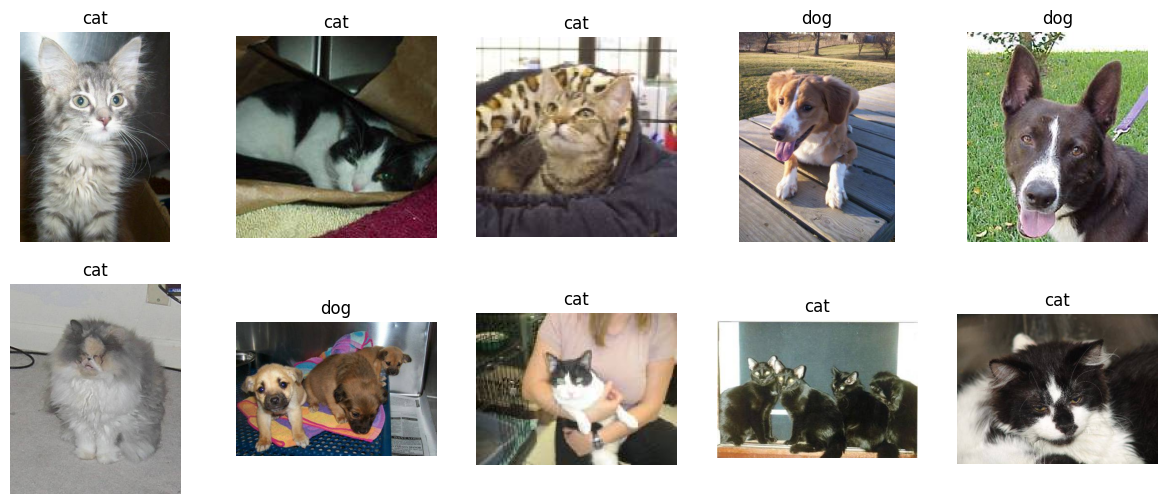

In [8]:
import os
import random
import matplotlib.image as mpimg



folder_path = "../Labb2/original_data/train/train"
image_files = [file for file in os.listdir(folder_path) if file.endswith('.jpg') or file.endswith('.png')]


random_image_files = random.sample(image_files, 10)


fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i, ax in enumerate(axes.flat):
   
    random_image_file = random_image_files[i]
    random_image_path = os.path.join(folder_path, random_image_file)
    random_image = mpimg.imread(random_image_path)
    
    label = random_image_file.split('.')[0]
    
    ax.imshow(random_image)
    ax.axis('off')
    ax.set_title(label)  

plt.show()

In [7]:
small_folder = "expriment_small_data"
tiny_folder = "expriment_tiny_data"
sub_files = ["train", "test", "val"]

if not os.path.exists(small_folder):
    os.mkdir(small_folder)
if not os.path.exists(tiny_folder):
    os.mkdir(tiny_folder)
    
for folder in sub_files:
    folder_small = os.path.join(small_folder, folder)
    if not os.path.exists(folder_small):
        os.mkdir(folder_small)    
for folder in sub_files:
    folder_tiny = os.path.join(tiny_folder, folder)
    if not os.path.exists(folder_tiny):
        os.mkdir(folder_tiny)    

In [2]:
import shutil
from sklearn.model_selection import train_test_split

folder_path


In [16]:
import os
import random
import shutil


train_folder = "../Labb2/original_data/train/train"
experiment_small_train = "../Labb2/expriment_small_data/train"
experiment_small_validation = "../Labb2/expriment_small_data/val"



train_files = [file for file in os.listdir(train_folder) if file.endswith('.jpg') or file.endswith('.png')]



    
selected_files = random.sample(train_files, min(2000, len(train_files)))

    
train_files = selected_files[:1600]
val_files = selected_files[1600:]

    
for file in train_files:
    source_path = os.path.join(train_folder, file)
    destination_path = os.path.join(experiment_small_train, file)
    shutil.copyfile(source_path, destination_path)

    
for file in val_files:
    source_path = os.path.join(train_folder, file)
    destination_path = os.path.join(experiment_small_validation, file)
    shutil.copyfile(source_path, destination_path)

In [17]:
test_folder = "../Labb2/original_data/test/test"
experiment_small_test = "../Labb2/expriment_small_data/test"

test_files = [file for file in os.listdir(test_folder) if file.endswith('.jpg') or file.endswith('.png')]

selected_files = random.sample(test_files, min(500, len(test_files)))

for file in selected_files:
    source_path = os.path.join(test_folder, file)
    destination_path = os.path.join(experiment_small_test, file)
    shutil.copyfile(source_path, destination_path)

In [47]:
import pandas as pd

images_train = "../Labb2/expriment_small_data/train"
images_val = "../Labb2/expriment_small_data/val"



file_labels = []


def create_dataframe(folder_path):
    file_labels = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.jpg') or file_name.endswith('.png'):
            label = file_name.split('.')[0]  
            file_labels.append({'file_name': file_name, 'label': label})
    df = pd.DataFrame(file_labels)
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)
    return df

train_df = create_dataframe(images_train)
val_df = create_dataframe(images_val)



print(val_df)


         file_name label
0     cat.9854.jpg   cat
1     dog.2437.jpg   dog
2    cat.11902.jpg   cat
3     cat.9934.jpg   cat
4     cat.3857.jpg   cat
..             ...   ...
395    cat.228.jpg   cat
396   cat.4801.jpg   cat
397   dog.1881.jpg   dog
398   dog.7071.jpg   dog
399   cat.4692.jpg   cat

[400 rows x 2 columns]


In [41]:
train_df["label"].unique()

array(['cat', 'dog'], dtype=object)

In [43]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown="ignore", sparse_output = False).set_output(transform="pandas")

ohetransform = ohe.fit_transform(train_df[["label"]])

In [44]:
ohetransform

,label_cat,label_dog
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
1595,0.0,1.0
1596,0.0,1.0
1597,0.0,1.0
1598,0.0,1.0


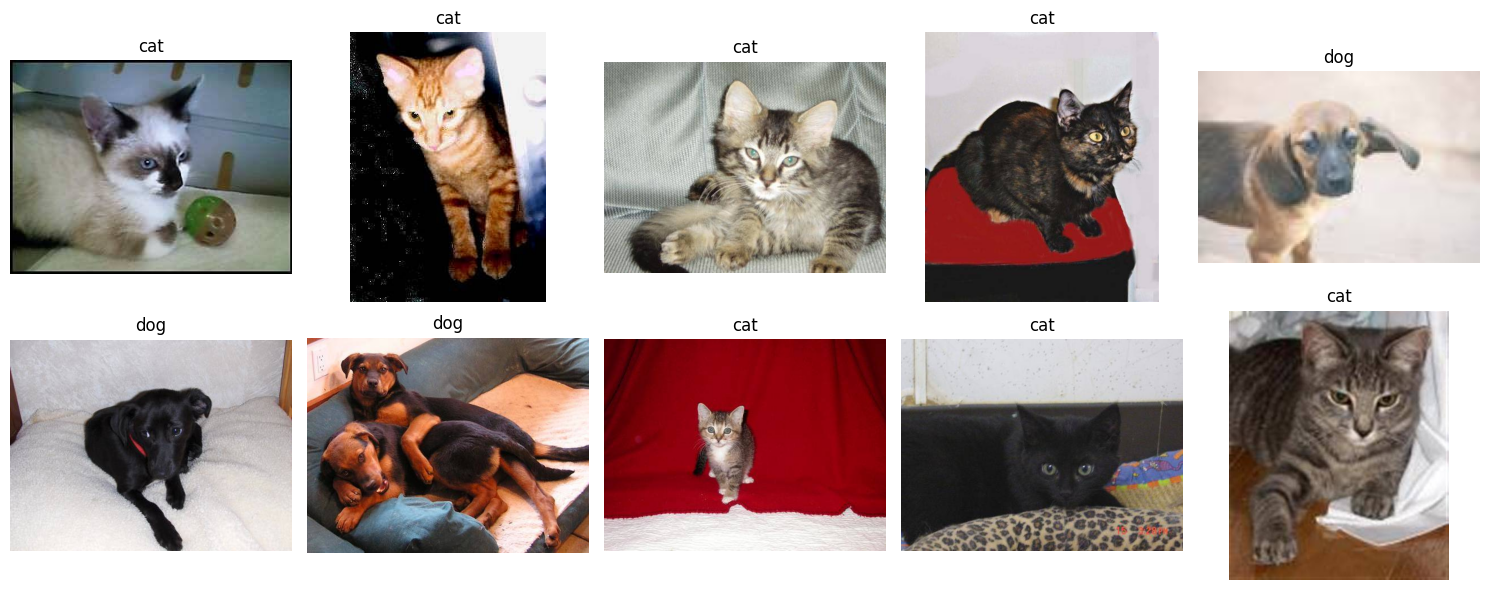

In [53]:
sample_df = train_df.head(10)

fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i, ax in enumerate(axes.flat):
    if i < len(sample_df):  
        row = sample_df.iloc[i]
        image_path = os.path.join(folder_path, row["file_name"])
        image = mpimg.imread(image_path)
        
        ax.imshow(image)
        ax.axis("off")
        ax.set_title(row["label"])
    else:  
        ax.axis("off")

plt.tight_layout()  
plt.show()

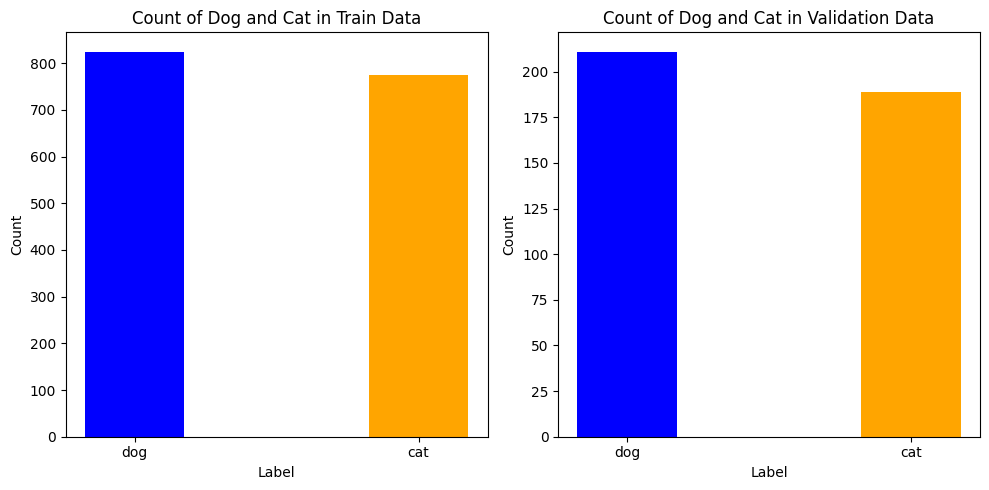

In [59]:
train_counts = train_df["label"].value_counts()
val_counts = val_df["label"].value_counts()

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
width = 0.35
labels = train_counts.index.tolist()

train_bars = ax[0].bar(labels, train_counts, width, color=["blue", "orange"])
ax[0].set_xlabel("Label")
ax[0].set_ylabel("Count")
ax[0].set_title("Count of Dog and Cat in Train Data")

val_bars = ax[1].bar(labels, val_counts, width, color=["blue", "orange"])
ax[1].set_xlabel("Label")
ax[1].set_ylabel("Count")
ax[1].set_title("Count of dogs and cats in Train Data")

plt.tight_layout()
plt.show()

### Count of animals within their indexspan so we can see that the dataframe have been randomed


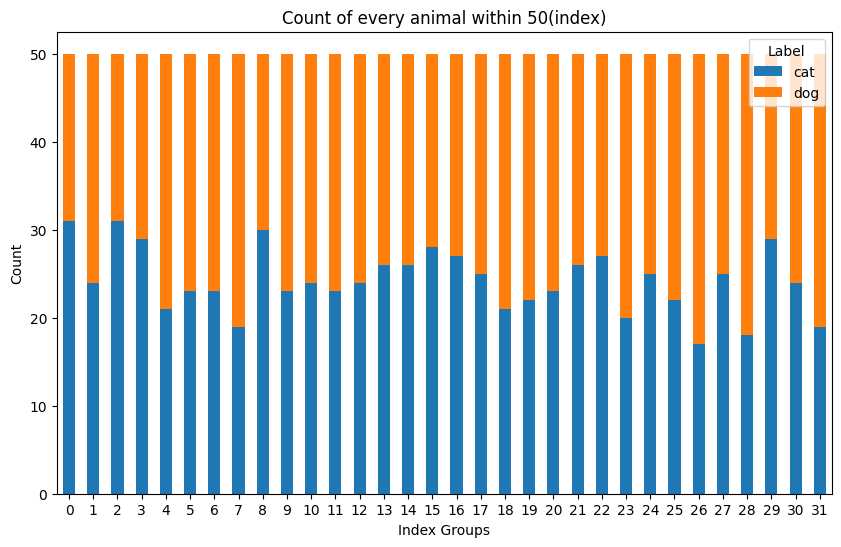

In [62]:
train_df["group"] = train_df.index // 50

# Count of animals so we can see
grouped_counts = train_df.groupby("group")["label"].value_counts().unstack(fill_value=0)

grouped_counts.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.xlabel("Index Groups")
plt.ylabel("Count")
plt.title("Count of every animal within 50(index)")
plt.legend(title="Label")
plt.xticks(rotation=0)
plt.show()


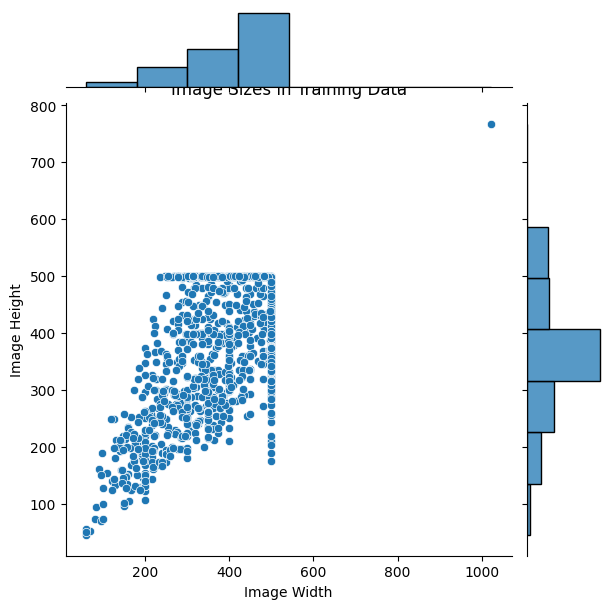

In [3]:
import os
data_path = "../Labb2/expriment_small_data/train"

image_size = []

for file_name in os.listdir(data_path):
    if file_name.endswith(".jpg"):
        file_path = os.path.join(data_path , file_name)
        image = plt.imread(file_path)
        height , width , _ = image.shape
        image_size.append((width , height))

widths , heights = zip(*image_size)

sns.jointplot( x= widths , y= heights , kind="scatter", marginal_kws=dict(bins=8, fill=True))

# Set labels and title
plt.xlabel("Image Width")
plt.ylabel("Image Height")
plt.title("Image Sizes in Training Data")

# Show the plot
plt.show()


##### Here is almost hte same plot but we toke away pictures that are too big and pictures that have too high diffrence in the axes

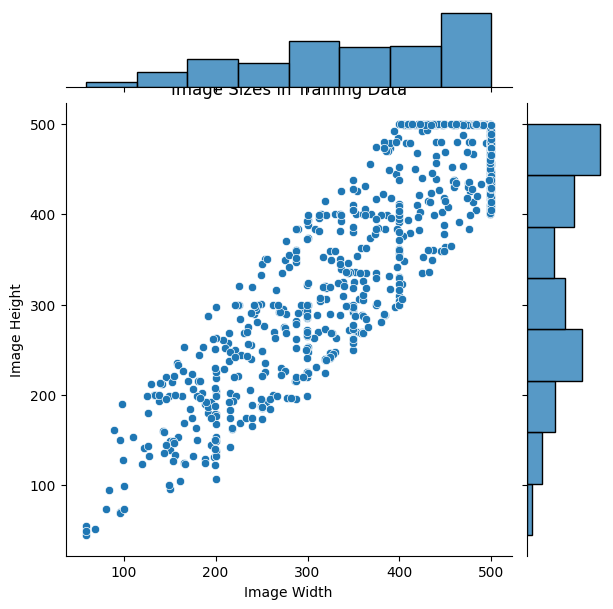

In [6]:
data_path = "../Labb2/expriment_small_data/train"

image_size = []

for file_name in os.listdir(data_path):
    if file_name.endswith(".jpg"):
        file_path = os.path.join(data_path, file_name)
        image = plt.imread(file_path)
        height, width, _ = image.shape
        
        if width <= 500 and height <= 500 and abs(width - height) <= 100 and abs(height - width) <= 100:
            image_size.append((width, height))


widths, heights = zip(*image_size) if image_size else ([], [])

sns.jointplot(x=widths, y=heights, kind="scatter", marginal_kws=dict(bins=8, fill=True))

plt.xlabel("Image Width")
plt.ylabel("Image Height")
plt.title("Image Sizes in Training Data")
plt.show()

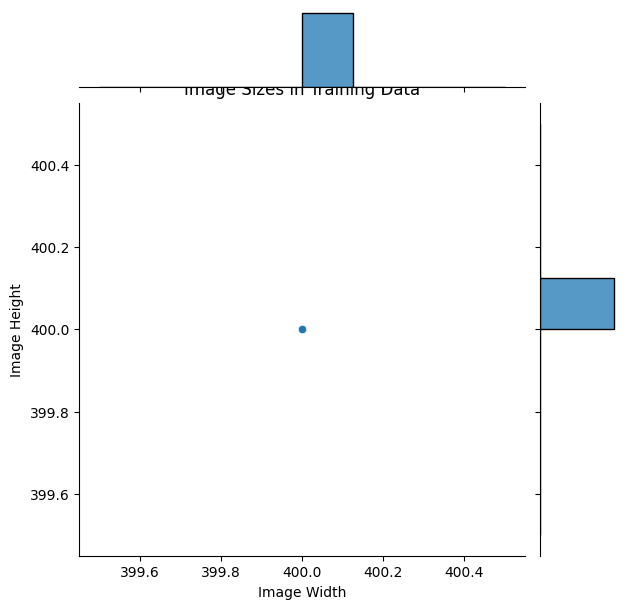

In [7]:
from PIL import Image

data_path = "../Labb2/expriment_small_data/train"
target_size = (400, 400)

image_size = []
resized_images = []

for file_name in os.listdir(data_path):
    if file_name.endswith(".jpg"):
        file_path = os.path.join(data_path, file_name)
        
        
        with Image.open(file_path) as img:
            resized_img = img.resize(target_size)
            width, height = resized_img.size
            
            
            if abs(width - height) <= 100 and abs(height - width) <= 100:
                image_size.append((width, height))
                
                # Convert the image to a numpy array and append to the list
                img_array = np.array(resized_img)
                resized_images.append(img_array)
                
                # Optionally, save the resized image back to disk if needed
                # resized_img.save(file_path)  # Uncomment this line to overwrite the original images


resized_images_array = np.array(resized_images)


widths, heights = zip(*image_size) if image_size else ([], [])


sns.jointplot(x=widths, y=heights, kind="scatter", marginal_kws=dict(bins=8, fill=True))


plt.xlabel("Image Width")
plt.ylabel("Image Height")
plt.title("Image Sizes in Training Data")
plt.show()

In [10]:
print("Shape of the numpy array:", resized_images_array.shape)

Shape of the numpy array: (1600, 400, 400, 3)
